In [0]:
import keras
import numpy as np
from keras.layers.convolutional import Conv2D
from keras.layers import Flatten
from keras.datasets import cifar10
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications import vgg16
from keras.layers import GlobalAveragePooling2D, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from skimage.transform import resize
from keras.optimizers import adam
from keras.utils import np_utils
import tensorflow as tf



In [0]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
NUM_CLASSES = 10
BATCH_SIZE = 2
NUM_EPOCHS = 15

In [0]:
# img_arr is of shape (n, h, w, c)
def resize_image_arr(img_arr):
    x_resized_list = []
    for i in range(img_arr.shape[0]):
        img = img_arr[0]
        resized_img = resize(img, (224, 224))
        x_resized_list.append(resized_img)
    return np.stack(x_resized_list)

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train[0:1000]
y_train = y_train[0:1000]
x_test = x_test[0:1000]
y_test = y_test[0:1000]

# Resize image arrays
x_train = resize_image_arr(x_train)
x_test = resize_image_arr(x_test)

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [93]:
base_model = vgg16.VGG16(include_top=False, weights='imagenet')

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)
# and a logistic layer -- 10 classes for CIFAR10
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# initiate RMSprop optimizer
#opt = keras.optimizers.rmsprop(lr=0.0, decay=0.0)

# Let's train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


58892288/58889256 [==============================] - 2s 0us/step


In [94]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [95]:
model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 10, 
                                 validation_data = (test_features, test_labels), verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=10)`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
390/390 [==============================] - 65s 167ms/step - loss: 0.2766 - acc: 0.9004 - val_loss: 0.2505 - val_acc: 0.9005
Epoch 2/10
390/390 [==============================] - 59s 152ms/step - loss: 0.2167 - acc: 0.9128 - val_loss: 0.1754 - val_acc: 0.9323
Epoch 3/10
390/390 [==============================] - 58s 149ms/step - loss: 0.1676 - acc: 0.9361 - val_loss: 0.1514 - val_acc: 0.9415
Epoch 4/10
390/390 [==============================] - 58s 149ms/step - loss: 0.1348 - acc: 0.9489 - val_loss: 0.1298 - val_acc: 0.9520
Epoch 5/10
390/390 [==============================] - 58s 149ms/step - loss: 0.1128 - acc: 0.9580 - val_loss: 0.1159 - val_acc: 0.9572
Epoch 6/10
390/390 [==============================] - 58s 149ms/step - loss: 0.0965 - acc: 0.9646 - val_loss: 0.1142 - val_acc: 0.9597
Epoch 7/10
390/390 [==============================] - 58s 149ms/step - loss: 0.0833 - acc: 0.9697 - val_loss: 0.1094 - val_acc: 0.9610
Epoch 8/10
390/390 [==============================] - 5

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [97]:
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 79.20


In [0]:
predicted = model.predict(test_features)
predicted_classes = np.argmax(predicted,axis=1)
predicted_classes

In [0]:
true_classes = np.argmax(test_labels,axis=1)
true_classes

In [16]:
count=0
image_index=list()
for i in range(len(true_classes)):
  if predicted_classes[i] != true_classes[i]:
    image_index.append(i)
    count+=1
print("Total number of missclassified images : ",count)

Total number of missclassified images :  2449


In [0]:
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image
from keras import backend as K
from google.colab.patches import cv2_imshow

In [0]:
labels = {0:'airplane', 
          1:'automobile',
          2:'bird',
          3:'cat',
          4:'deer',
          5:'dog',
          6:'frog',
          7:'horse',
          8:'ship',
          9:'truck'}

True Label :  frog
Predicted Label :  dog


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


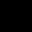

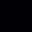


True Label :  dog
Predicted Label :  deer


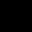

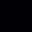


True Label :  deer
Predicted Label :  dog


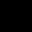

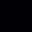


True Label :  truck
Predicted Label :  automobile


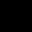

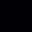


True Label :  deer
Predicted Label :  ship


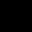

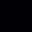


True Label :  bird
Predicted Label :  ship


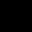

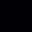


True Label :  deer
Predicted Label :  dog


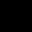

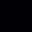


True Label :  dog
Predicted Label :  cat


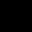

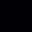


True Label :  truck
Predicted Label :  ship


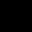

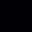


True Label :  airplane
Predicted Label :  horse


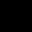

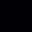


True Label :  horse
Predicted Label :  dog


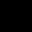

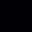


True Label :  deer
Predicted Label :  cat


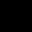

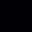


True Label :  frog
Predicted Label :  dog


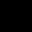

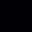


True Label :  cat
Predicted Label :  dog


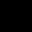

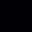


True Label :  airplane
Predicted Label :  automobile


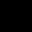

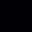

KeyboardInterrupt: ignored

In [37]:
for i in range(50):
  true_label = true_classes[image_index[i]]
  predicted_label = predicted_classes[image_index[i]]
  testimage1 = test_features[image_index[i]]
  testimage1 = cv2.resize(testimage1, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
  x = image.img_to_array(testimage1)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
#   print(class_idx)
  class_output =model.output[:, class_idx]
  last_conv_layer = model.get_layer("res5c_branch2c")
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
#   print(grads.shape)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
#   print(pooled_grads.shape)
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
  heatmap = np.mean(conv_layer_output_value, axis = -1)
#   print(conv_layer_output_value.shape)
#   print(heatmap.shape)
  heatmap = np.maximum(heatmap, 0)
  try:
    heatmap /= np.max(heatmap)
  except:
    print('Can not divided by NaN')
  heatmap = cv2.resize(heatmap, (testimage1.shape[1], testimage1.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  superimposed_img = cv2.addWeighted(testimage1, 0.5, heatmap, 0.5,0,dtype=cv2.CV_32F)
  print('True Label : ',labels[true_label])
  print('Predicted Label : ',labels[predicted_label])
  cv2_imshow(testimage1)
  cv2_imshow(superimposed_img)
  print()